In [1]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

import torch
torch.set_float32_matmul_precision('high')

In [2]:
# Import the relevant modules
import sousvide.synthesize.rollout_generator as rg
import sousvide.synthesize.observation_generator as og
import sousvide.instruct.train_policy as tp
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_learning as pl
import sousvide.flight.deploy_figs as df

Process ForkProcess-1:
Process ForkProcess-19:
Process ForkProcess-5:
Process ForkProcess-25:
Process ForkProcess-3:
Process ForkProcess-17:
Process ForkProcess-27:
Process ForkProcess-9:
Process ForkProcess-21:
Process ForkProcess-24:
Process ForkProcess-18:
Process ForkProcess-6:
Process ForkProcess-4:
Process ForkProcess-16:
Process ForkProcess-11:
Process ForkProcess-7:
Process ForkProcess-15:
Process ForkProcess-12:
Process ForkProcess-26:
Process ForkProcess-20:
Process ForkProcess-28:
Process ForkProcess-23:
Process ForkProcess-10:
Process ForkProcess-8:
Process ForkProcess-2:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkProcess-22:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):


In [17]:
cohort = "test0"

data_method = "test0_data"
eval_method = "test0_eval"

scene = "mid_gate"

courses = ["traverse"]   

roster = [
    # "hsCameron",
    # "hsDavion",
    # "hsKurita",
    # "hsLiao",
    # "hsSteiner",
    "clanGhostBear",
    "clanJadeFalcon",
    # "clanNovaCat",
    # "clanSmokeJaguar"
    ]

In [ ]:
# Generate Rollouts
rg.generate_rollout_data(cohort,courses,scene,data_method)

# Review the Rollout Data
ps.plot_rollout_data(cohort)

In [15]:
# Generate initial observation data sets
og.generate_observation_data(cohort,roster)

Generating observation data with subsample ratio 1.0 for...
 Cohort : test0
 Roster : ['clanJadeFalcon']
 Courses: ['traverse']

Output()

Using existing observation data...

Output()

======================================================================
Cohort : test0          Network: featNet
======================================================================
----------------------------------------------------------------------
Student: clanGhostBear | Epochs: 500   | Data Size: 9750.0/1365.0                
Time: 0h 5m 49s     | Train: 0.0002 | Test: 0.0002
======================================================================

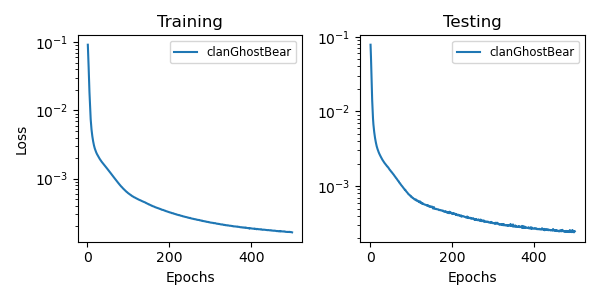

In [11]:
tp.train_roster(cohort,roster,"featNet",300)

pl.plot_losses(cohort,roster,"featNet",use_log=True)

Using existing observation data...

Output()

======================================================================
Cohort : test0          Network: commNet
======================================================================
----------------------------------------------------------------------
Student: clanJadeFalcon | Epochs: 1000  | Data Size: 9750.0/1365.0                
Time: 0h 11m 50s    | Train: 0.0253 | Test: 0.0358
======================================================================

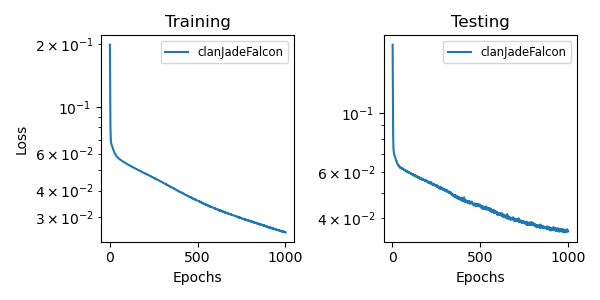

In [16]:
# Train the Policy
tp.train_roster(cohort,roster,"commNet",1000)
# tp.train_roster(cohort,roster,"commNet",1200,regen=True)
# tp.train_roster(cohort,roster,"commNet",200,
#                 use_deploy=scene,deploy_method=eval_method,lim_sv=50)

pl.plot_losses(cohort,roster,"commNet",use_log=True)

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from outputs/mid_gate/splatfacto/2024-10-07_145741/nerfstudio_models/step-000029999.ckpt

Plotting trajectories for expert...

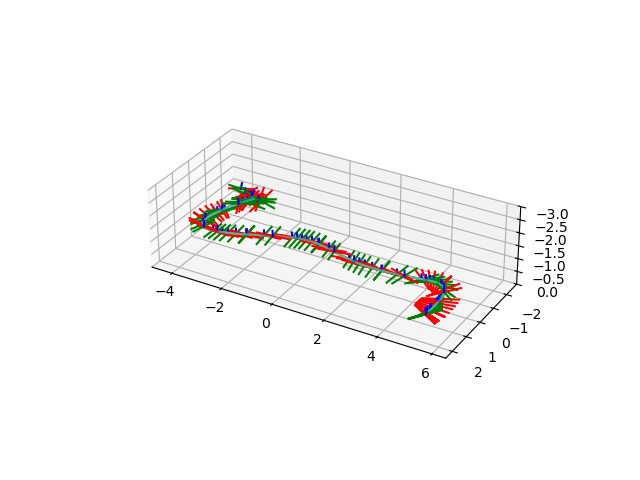

Plotting trajectories for clanGhostBear...

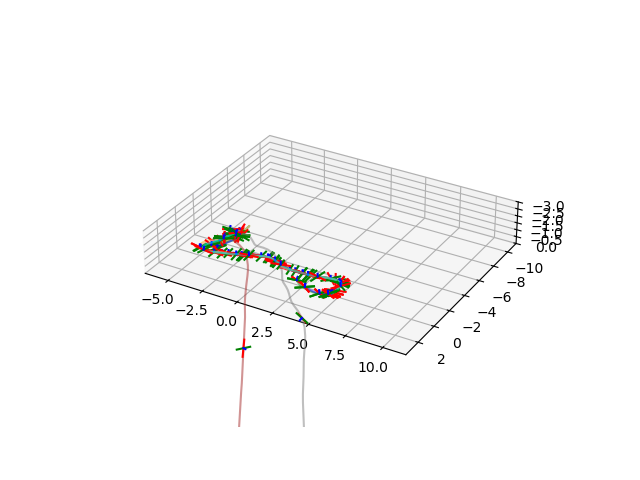

Plotting trajectories for clanJadeFalcon...

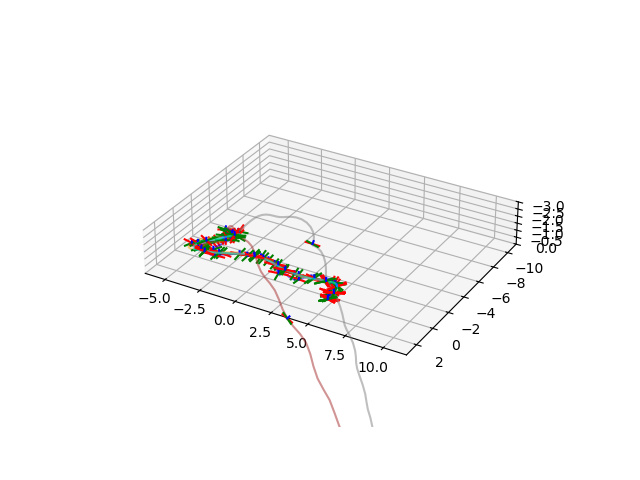

                         Deployment Summary                         
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓
┃ Pilot          ┃ TTE Mean ┃ TTE Best ┃  PP  ┃ Hz Mean ┃ Hz Worst ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩
│ expert         │   0.11   │   0.10   │ 0.99 │ 203.08  │  62.50   │
│ clanGhostBear  │  50.41   │   0.10   │ 0.69 │ 1048.44 │  194.79  │
│ clanJadeFalcon │  52.75   │   0.13   │ 0.61 │ 1061.14 │  192.35  │
└────────────────┴──────────┴──────────┴──────┴─────────┴──────────┘

In [18]:
# Simulate in FiGS
for course in courses:
    df.deploy_roster(cohort,course,scene,eval_method,roster,mode="visualize")
    pl.plot_deployments(cohort,course,roster,plot_show=True)